In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

2 - Data collection and description

In [84]:
df = pd.read_excel("/content/Airlines+Data.xlsx")

In [117]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [85]:
df1 = df.copy()

In [86]:
df1.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [87]:
df1.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [88]:
df1.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [89]:
df1 = df1.set_index('Month')

In [118]:
df1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


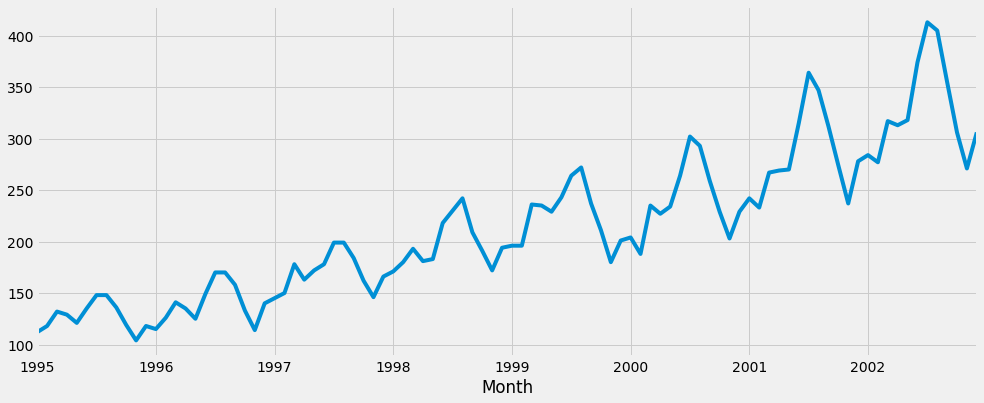

In [90]:
df1['Passengers'].plot(figsize=(15, 6))
plt.show()

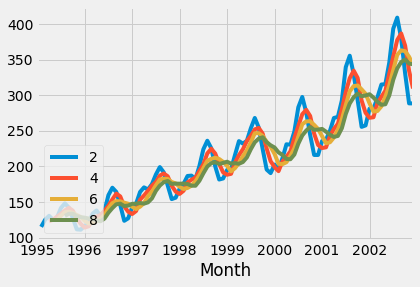

In [91]:
for i in range(2,10,2):
    df1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

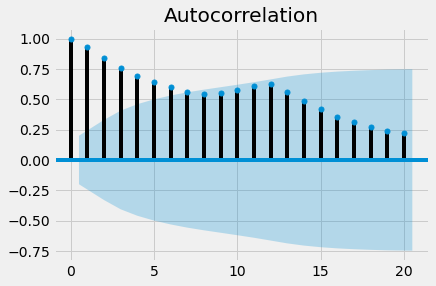

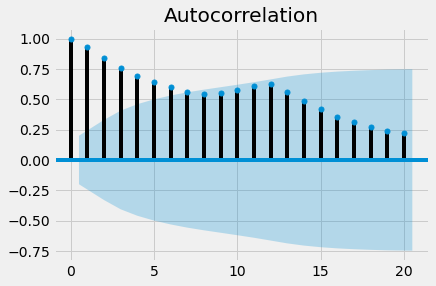

In [92]:
tsa_plots.plot_acf(df1.Passengers)

3 - Building Time series forecasting with ARIMA

In [93]:
X = df1['Passengers'].values

In [94]:
size = int(len(X) * 0.66)

In [95]:
train, test = X[0:size], X[size:len(X)]

In [96]:
model = ARIMA(train, order=(5,1,0))


In [97]:
model_fit = model.fit(disp=0)

In [98]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   62
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -262.909
Method:                       css-mle   S.D. of innovations             16.748
Date:                Wed, 25 Aug 2021   AIC                            539.817
Time:                        16:48:24   BIC                            554.707
Sample:                             1   HQIC                           545.663
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7497      1.477      1.185      0.241      -1.145       4.644
ar.L1.D.y      0.0905      0.134      0.677      0.501      -0.171       0.352
ar.L2.D.y     -0.2096      0.135     -1.549      0.1

This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations

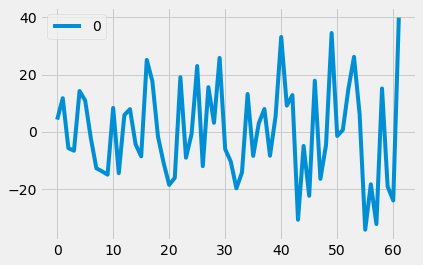

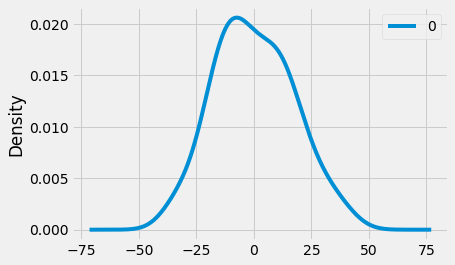

               0
count  62.000000
mean    0.057364
std    16.895802
min   -34.303286
25%   -12.610640
50%    -1.589466
75%    12.565614
max    39.955363


In [99]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [100]:
history = [x for x in train]

In [101]:
predictions = list()

In [102]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=239.755184, expected=227.000000
predicted=220.737305, expected=234.000000
predicted=237.815015, expected=264.000000
predicted=252.750575, expected=302.000000
predicted=306.715777, expected=293.000000
predicted=285.374643, expected=259.000000
predicted=250.264011, expected=229.000000
predicted=227.093114, expected=203.000000
predicted=211.011442, expected=229.000000
predicted=253.260259, expected=242.000000
predicted=252.490692, expected=233.000000
predicted=234.042128, expected=267.000000
predicted=268.773634, expected=269.000000
predicted=261.782249, expected=270.000000
predicted=271.798050, expected=315.000000
predicted=314.422119, expected=364.000000
predicted=368.637725, expected=347.000000
predicted=334.957879, expected=312.000000
predicted=301.161832, expected=274.000000
predicted=265.936449, expected=237.000000
predicted=244.037190, expected=278.000000
predicted=312.961772, expected=284.000000
predicted=291.748155, expected=277.000000
predicted=284.551875, expected=317

In [103]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 782.495


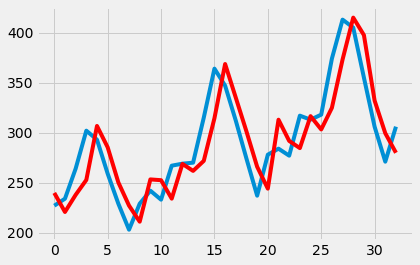

In [104]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale¶

4 - Comparing Multiple Models

In [112]:
df2 = df.copy()

In [113]:
df2 = pd.get_dummies(df, columns = ['Month'])

In [114]:
df2.head()

,Passengers,Month_1995-01-01 00:00:00,Month_1995-02-01 00:00:00,Month_1995-03-01 00:00:00,Month_1995-04-01 00:00:00,Month_1995-05-01 00:00:00,Month_1995-06-01 00:00:00,Month_1995-07-01 00:00:00,Month_1995-08-01 00:00:00,Month_1995-09-01 00:00:00,Month_1995-10-01 00:00:00,Month_1995-11-01 00:00:00,Month_1995-12-01 00:00:00,Month_1996-01-01 00:00:00,Month_1996-02-01 00:00:00,Month_1996-03-01 00:00:00,Month_1996-04-01 00:00:00,Month_1996-05-01 00:00:00,Month_1996-06-01 00:00:00,Month_1996-07-01 00:00:00,Month_1996-08-01 00:00:00,Month_1996-09-01 00:00:00,Month_1996-10-01 00:00:00,Month_1996-11-01 00:00:00,Month_1996-12-01 00:00:00,Month_1997-01-01 00:00:00,Month_1997-02-01 00:00:00,Month_1997-03-01 00:00:00,Month_1997-04-01 00:00:00,Month_1997-05-01 00:00:00,Month_1997-06-01 00:00:00,Month_1997-07-01 00:00:00,Month_1997-08-01 00:00:00,Month_1997-09-01 00:00:00,Month_1997-10-01 00:00:00,Month_1997-11-01 00:00:00,Month_1997-12-01 00:00:00,Month_1998-01-01 00:00:00,Month_1998-02-01 00:00:00,Month_1998-03-01 00:00:00,...,Month_1999-09-01 00:00:00,Month_1999-10-01 00:00:00,Month_1999-11-01 00:00:00,Month_1999-12-01 00:00:00,Month_2000-01-01 00:00:00,Month_2000-02-01 00:00:00,Month_2000-03-01 00:00:00,Month_2000-04-01 00:00:00,Month_2000-05-01 00:00:00,Month_2000-06-01 00:00:00,Month_2000-07-01 00:00:00,Month_2000-08-01 00:00:00,Month_2000-09-01 00:00:00,Month_2000-10-01 00:00:00,Month_2000-11-01 00:00:00,Month_2000-12-01 00:00:00,Month_2001-01-01 00:00:00,Month_2001-02-01 00:00:00,Month_2001-03-01 00:00:00,Month_2001-04-01 00:00:00,Month_2001-05-01 00:00:00,Month_2001-06-01 00:00:00,Month_2001-07-01 00:00:00,Month_2001-08-01 00:00:00,Month_2001-09-01 00:00:00,Month_2001-10-01 00:00:00,Month_2001-11-01 00:00:00,Month_2001-12-01 00:00:00,Month_2002-01-01 00:00:00,Month_2002-02-01 00:00:00,Month_2002-03-01 00:00:00,Month_2002-04-01 00:00:00,Month_2002-05-01 00:00:00,Month_2002-06-01 00:00:00,Month_2002-07-01 00:00:00,Month_2002-08-01 00:00:00,Month_2002-09-01 00:00:00,Month_2002-10-01 00:00:00,Month_2002-11-01 00:00:00,Month_2002-12-01 00:00:00
0,112,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,118,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,132,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,129,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,121,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
t= np.arange(1,97)

In [120]:
df2['t'] = t

In [121]:
df2['t_sq'] = df2['t']*df2['t']

In [124]:
log_Passengers=np.log(df2['Passengers'])

In [125]:
df2['log_Passengers']=log_Sales

In [126]:
df2.head()

,Passengers,Month_1995-01-01 00:00:00,Month_1995-02-01 00:00:00,Month_1995-03-01 00:00:00,Month_1995-04-01 00:00:00,Month_1995-05-01 00:00:00,Month_1995-06-01 00:00:00,Month_1995-07-01 00:00:00,Month_1995-08-01 00:00:00,Month_1995-09-01 00:00:00,Month_1995-10-01 00:00:00,Month_1995-11-01 00:00:00,Month_1995-12-01 00:00:00,Month_1996-01-01 00:00:00,Month_1996-02-01 00:00:00,Month_1996-03-01 00:00:00,Month_1996-04-01 00:00:00,Month_1996-05-01 00:00:00,Month_1996-06-01 00:00:00,Month_1996-07-01 00:00:00,Month_1996-08-01 00:00:00,Month_1996-09-01 00:00:00,Month_1996-10-01 00:00:00,Month_1996-11-01 00:00:00,Month_1996-12-01 00:00:00,Month_1997-01-01 00:00:00,Month_1997-02-01 00:00:00,Month_1997-03-01 00:00:00,Month_1997-04-01 00:00:00,Month_1997-05-01 00:00:00,Month_1997-06-01 00:00:00,Month_1997-07-01 00:00:00,Month_1997-08-01 00:00:00,Month_1997-09-01 00:00:00,Month_1997-10-01 00:00:00,Month_1997-11-01 00:00:00,Month_1997-12-01 00:00:00,Month_1998-01-01 00:00:00,Month_1998-02-01 00:00:00,Month_1998-03-01 00:00:00,...,Month_2000-01-01 00:00:00,Month_2000-02-01 00:00:00,Month_2000-03-01 00:00:00,Month_2000-04-01 00:00:00,Month_2000-05-01 00:00:00,Month_2000-06-01 00:00:00,Month_2000-07-01 00:00:00,Month_2000-08-01 00:00:00,Month_2000-09-01 00:00:00,Month_2000-10-01 00:00:00,Month_2000-11-01 00:00:00,Month_2000-12-01 00:00:00,Month_2001-01-01 00:00:00,Month_2001-02-01 00:00:00,Month_2001-03-01 00:00:00,Month_2001-04-01 00:00:00,Month_2001-05-01 00:00:00,Month_2001-06-01 00:00:00,Month_2001-07-01 00:00:00,Month_2001-08-01 00:00:00,Month_2001-09-01 00:00:00,Month_2001-10-01 00:00:00,Month_2001-11-01 00:00:00,Month_2001-12-01 00:00:00,Month_2002-01-01 00:00:00,Month_2002-02-01 00:00:00,Month_2002-03-01 00:00:00,Month_2002-04-01 00:00:00,Month_2002-05-01 00:00:00,Month_2002-06-01 00:00:00,Month_2002-07-01 00:00:00,Month_2002-08-01 00:00:00,Month_2002-09-01 00:00:00,Month_2002-10-01 00:00:00,Month_2002-11-01 00:00:00,Month_2002-12-01 00:00:00,t,t_sq,log_Sales,log_Passengers
0,112,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,7.458663,7.458663
1,118,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,7.716443,7.716443
2,132,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,9,7.837477,7.837477
3,129,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,16,7.675529,7.675529
4,121,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,25,7.344602,7.344602


In [127]:
train1, test1 = np.split(df2, [int(.67 *len(df2))])

In [130]:
linear= smf.ols('Passengers ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Passengers'])-np.array(predlin))**2))
rmselin


25.50398351648347

In [131]:
quad=smf.ols('Passengers~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predquad))**2))
rmsequad


53.1895551441541

In [132]:
expo=smf.ols('log_Passengers~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

12233.614822414562

5 - Conclusion

In [134]:
output = {'Model':pd.Series(['rmseaddquad','rmseexpo','rmselin']),
          'Values':pd.Series([rmseaddquad,rmseexpo,rmselin,])}

In [135]:
rmse=pd.DataFrame(output)

In [136]:
print(rmse)

         Model        Values
0  rmseaddquad    412.114444
1     rmseexpo  12233.614822
2      rmselin     25.503984


linear model is the best model